In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

# 路徑設定 
train_dir = 'C:/Users/User/Python/pj2/Gender classification/train'
test_dir = 'C:/Users/User/Python/pj2/Gender classification/test'

In [2]:
# 資料增強
train_datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator_aug = train_datagen_aug.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 220 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [3]:
# 建立CNN(與實驗一相同)
model_aug = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_aug.compile(optimizer=Adam(),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [4]:
# 訓練模型
history_aug = model_aug.fit(
    train_generator_aug,
    epochs=10,
    validation_data=test_generator
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 7 steps, validate for 3 steps
Epoch 1/10
7/7 [==============================] - 43s 6s/step - loss: 2.2910 - accuracy: 0.5364 - val_loss: 1.0353 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 39s 6s/step - loss: 0.8130 - accuracy: 0.4364 - val_loss: 0.7095 - val_accuracy: 0.5000
Epoch 3/10
7/7 [==============================] - 39s 6s/step - loss: 0.6897 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.4875
Epoch 4/10
7/7 [==============================] - 39s 6s/step - loss: 0.6948 - accuracy: 0.5045 - val_loss: 0.6928 - val_accuracy: 0.4500
Epoch 5/10
7/7 [==============================] - 39s 6s/step - loss: 0.6895 - accuracy: 0.5636 - val_loss: 0.6909 - val_accuracy: 0.5125
Epoch 6/10
7/7 [==============================] - 39s 6s/step - loss: 0.6860 - accuracy: 0.5545 - val_loss: 0.6894 - val_accuracy: 0.4500
Epoch 7/10
7/7 [==============================] - 39s 6s/step - loss: 0.6825 - acc

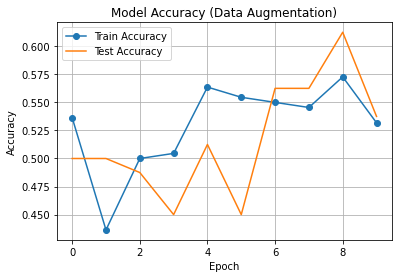

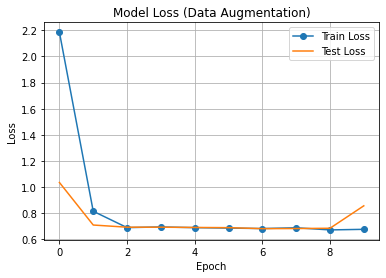

In [5]:
# 準確率曲線
plt.plot(history_aug.history['accuracy'], 'o-', label='Train Accuracy') # 實心圓
plt.plot(history_aug.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy (Data Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# 損失曲線
plt.plot(history_aug.history['loss'], 'o-', label='Train Loss')
plt.plot(history_aug.history['val_loss'], label='Test Loss') 
plt.title('Model Loss (Data Augmentation)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# 整理表格
history_aug_df = pd.DataFrame(history_aug.history)
history_aug_df.columns = ['Train Loss', 'Train Accuracy', 'Test Loss', 'Test Accuracy']
history_aug_df.index += 1
history_aug_df.index.name = 'Epoch'

# 四捨五入到第4位
rounded_aug_df = history_aug_df.round(4)

# 印出表格
print(tabulate(rounded_aug_df, headers='keys', tablefmt='grid', showindex=True, stralign='left', numalign='left'))

+---------+--------------+------------------+-------------+-----------------+
| Epoch   | Train Loss   | Train Accuracy   | Test Loss   | Test Accuracy   |
+=========+==============+==================+=============+=================+
| 1       | 2.1857       | 0.5364           | 1.0353      | 0.5             |
+---------+--------------+------------------+-------------+-----------------+
| 2       | 0.8149       | 0.4364           | 0.7095      | 0.5             |
+---------+--------------+------------------+-------------+-----------------+
| 3       | 0.6897       | 0.5              | 0.6929      | 0.4875          |
+---------+--------------+------------------+-------------+-----------------+
| 4       | 0.6949       | 0.5045           | 0.6928      | 0.45            |
+---------+--------------+------------------+-------------+-----------------+
| 5       | 0.6894       | 0.5636           | 0.6909      | 0.5125          |
+---------+--------------+------------------+-------------+-----